# Assignment 2 - Find complex answers to medical questions

**Submission deadline: Friday 22 April, 5pm.** 

Late submissions **will not be accepted** without an approved [Special Consideration](http://from.mq.edu.au/MT0X0E0FUrrU200rm0JB0U0) request.  Assessments submitted after the due date will receive a mark of **zero**.

**Assessment marks: 20 marks (20% of the total unit assessment)**

In this assignment we will work on a task of "query-focused summarisation" on medical questions where the goal is, given a medical question and a list of sentences extracted from relevant medical publications, to determine which of these sentences from the list can be used as part of the answer to the question.

We will use data that has been derived from the **BioASQ challenge** (http://www.bioasq.org/), after some data manipulation to make it easier to process for this assignment. The BioASQ challenge organises several "shared tasks", including a task on biomedical semantic question answering which we are using here. The data are in the file `bioasq10_labelled.csv`, which is part of the zip file provided. Each row of the file has a question, a sentence text, and a label that indicates whether the sentence text is part of the answer to the question (1) or not (0).

The following code uses pandas to store the file `bioasq10_labelled.csv` in a data frame and show the first rows of data. For this code to run, first you need to unzip the file `data.zip`:

In [1]:
#!unzip data.zip

In [2]:
import pandas as pd
dataset = pd.read_csv("bioasq10b_labelled.csv")
dataset[0:5]

,qid,sentid,question,sentence text,label
0,0,0,Is Hirschsprung disease a mendelian or a multi...,Hirschsprung disease (HSCR) is a multifactoria...,0
1,0,1,Is Hirschsprung disease a mendelian or a multi...,"In this study, we review the identification of...",1
2,0,2,Is Hirschsprung disease a mendelian or a multi...,The majority of the identified genes are relat...,1
3,0,3,Is Hirschsprung disease a mendelian or a multi...,The non-Mendelian inheritance of sporadic non-...,1
4,0,4,Is Hirschsprung disease a mendelian or a multi...,Coding sequence mutations in e.g.,0


The columns of the CSV file are:

* `qid`: an ID for a question. Several rows may have the same question ID, as we can see above.
* `sentid`: an ID for a sentence.
* `question`: The text of the question. In the above example, the first rows all have the same question: "Is Hirschsprung disease a mendelian or a multifactorial disorder?"
* `sentence text`: The text of the sentence.
* `label`: 1 if the sentence is a part of the answer, 0 if the sentence is not part of the answer.

# Task 1 (5 marks): Data preparation

Partition the data into the training, dev_test, and test sets using the proportions 6:2:2. That is, 60% of the questions must be in the training set, 20% must be in the dev_test set, and the remaining 20% in the test set. Make sure that you partition based on the questions, not on the rows. With this we mean that all the sentences related to a question must be in one file only. In other words, there must not be sentences from the same question in, say, the training and the test data.

Also, make sure that you implement a random partition.

Save the partitions as the files `training.csv`, `dev_test.csv`, and `test.csv`, so that they can be used by other people.

The breakdown of marks is as follows:

* **1 mark** if your explanation answers the following question correctly: Why do we want to split the partition on the questions, and not on the rows?
* **1 mark** if the code partitions the data on the questions randomly and according to the split 6:2:2.
* **1 mark** if your code generates partitions that have similar balance of labels and you demonstrate that they are similar.
* **1 mark** if the partitions are saved as the CSV files `training.csv`, `dev_test.csv`, and `test.csv`.
* **1 mark** for good coding and documentation in this task.


In [3]:
#random shuffling of each group of question
import random
random.seed(1234)
groups = [dataset for i , dataset in dataset.groupby('qid')]
random.shuffle(groups)
dataset2 = pd.concat(groups).reset_index(drop=True)

In [4]:
#multiindexing the entire dataset so it easy to split
dataset2.set_index(['qid', 'sentid'], inplace=True)
dataset2.groupby(level=[0,1]) 

In [5]:
#the count of unique questions
maxi = dataset2.index.get_level_values('qid').nunique()
maxi

4234

In [6]:
# training table
rowcount = 0
store = 0
for result in dataset2.index.get_level_values('qid').unique():
    if store != int(maxi*0.6):
        rowcount += dataset2.loc[result,"question"].count()
        store+=1
training_df = pd.DataFrame(dataset2[0:rowcount])
training_df = training_df.reset_index()
training_df.to_csv('training.csv', index=False)

In [7]:
pd.read_csv("training.csv")[0:5]

,qid,sentid,question,sentence text,label
0,3143,0,"Velocardial facial syndrome, otherwise known a...",The deletion of chromosome 22q11.2 is involved...,1
1,3143,1,"Velocardial facial syndrome, otherwise known a...",deletions of chromosome 7q11.23 (Williams synd...,0
2,3143,2,"Velocardial facial syndrome, otherwise known a...",Submicroscopic deletions of chromosome 22q11 h...,1
3,3143,3,"Velocardial facial syndrome, otherwise known a...",The 22q11.2 deletion syndrome (di George syndr...,1
4,3143,4,"Velocardial facial syndrome, otherwise known a...",UNLABELLED\nMost of the children with Di Georg...,0


In [8]:
# dev_test table
dataset3 = pd.DataFrame(dataset2[rowcount:len(dataset2)])

In [9]:
maxi2 = dataset3.index.get_level_values('qid').nunique()

In [10]:
rowcount2 = 0
store2 = 0
for result in dataset3.index.get_level_values('qid').unique():
    if store2 != int(maxi2*0.5):
        rowcount2 += dataset3.loc[result,"question"].count()
        store2+=1
dev_test_df = pd.DataFrame(dataset3[0:rowcount2])
dev_test_df = dev_test_df.reset_index()
dev_test_df.to_csv('dev_test.csv', index=False)

In [11]:
pd.read_csv('dev_test.csv')[0:5]

,qid,sentid,question,sentence text,label
0,2307,0,Do cephalopods use RNA editing less frequently...,Extensive messenger RNA editing generates tran...,1
1,2307,1,Do cephalopods use RNA editing less frequently...,By adopting a method originally designed to de...,1
2,2307,2,Do cephalopods use RNA editing less frequently...,We here show that RNA editing is particularly ...,0
3,2307,3,Do cephalopods use RNA editing less frequently...,Even for the subset of RNA editing sites share...,1
4,2307,4,Do cephalopods use RNA editing less frequently...,"Coleoid cephalopods (octopus, squid and cuttle...",0


In [12]:
#test dataset
test_df = pd.DataFrame(dataset3[rowcount2:len(dataset3)])
test_df = test_df.reset_index()
test_df.to_csv('test.csv', index=False)

In [13]:
pd.read_csv("test.csv")[0:5]

,qid,sentid,question,sentence text,label
0,3633,0,Which method has been developed for mapping of...,SLIC-CAGE: high-resolution transcription start...,0
1,3633,1,Which method has been developed for mapping of...,Cap analysis of gene expression (CAGE) is a me...,1
2,3633,2,Which method has been developed for mapping of...,In combination with high-throughput sequencing...,1
3,3633,3,Which method has been developed for mapping of...,The biggest limitation of CAGE is that even th...,0
4,3633,4,Which method has been developed for mapping of...,"Here, we present SLIC-CAGE, a Super-Low Input ...",1


# Task 2 (5 marks): Cosine similarity

Use the files `training.csv`, `dev_test.csv`, and `test.csv` provided by us in the file `data.zip` (so that any possible errors that you may have introduced in task 1 do not propagate to this task and following tasks).

Implement a simple text summariser that is based on the cosine similarity between the question and the text. Use the following function signature.

```{python}
def cosine_summariser(csvfile, questionids, n=5):
   """Return the IDs of the n sentences that have the highest cosine similarity
    with the question. The input questionids is a list of question ids. The 
    output is a list of lists of sentence ids
    >>> cosine_summariser('test.csv', [3, 11], 3)
    [[3, 1, 4], [12, 4, 13]]"""

```

To obtain the text vectors, use sklearn's tf.idf libraries this way:

* Use all the defaults from the TfidfVectorizer instance, except for `stop_words="english"` and `max_features=10000`. The latter option will restrict the vocabulary size to 10,000. This will speed up the computations and reduce the memory footprint in the subsequent tasks.
* Use the `fit` method on the text of `training.csv`. In your documentation, please explain and justify what decision choices you made to select the correct text: would you use the question text only, the sentence text, or both?

Evaluate the summariser by reporting the mean F1 score on each of the three CSV files `training.csv`, `devtest.csv`, and `test.csv`, for $n=5$. To calculate the mean F1 score, do this:

1. For each question ID in the file, calculate the F1 score by comparing the result of your cosine summariser and the given labels. Feel free to use sklearn's functions to compute the F1 score, or implement your own version of the F1 scoring function if you prefer.
2. Calculate the mean of the F1 scores calculated in step 1.

Find the value of $n$ that returns the highest mean F1 score on the dev_test data.

The breakdown of marks is as follows:

* **1 mark** if the code generates the tf.idf vectors correctly. The explanations that justify the decisions made are reasonable. In particular, explain and justify what information you used to fit tf.idf.
* **1 mark** if the code calculates cosine similarity correctly.
* **1 mark** if the code returns the IDs of the $n$ sentences that have the highest cosine similarity with the question.
* **1 mark** if the notebook reports the F1 scores of the dev_test file and identifies the value of $n$ that gives the highest score on the dev_test file.
* **1 mark** for good coding and documentation in this task. In particular, comment on the reason why you think the value of $n$ that gives highest F1 has that value.

In [14]:
# we will use the sentences only to conduct the tfidf. 
#it is the respresentation of the text. 
#the question has no relation to the text. so it can only be used as query

In [15]:
#conducting the tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise
import numpy as np

In [16]:
def cosine_Read():
    df = pd.read_csv("data/training.csv")
    corpus = list()
    counter = 0
    for i in df['qid'].unique():
        new_table = df.loc[df['qid'] == i]
        string = ''
        for j in range(len(new_table)):
            if counter != len(new_table):
                string += new_table['sentence text'].loc[counter] + ' '
                counter += 1
        corpus.append(string)
    return corpus

In [17]:
def cosine_summariser(csvfile, questionids, n):
    df = pd.read_csv(csvfile)
    corpus = cosine_Read()
    tfidf = TfidfVectorizer(stop_words="english", use_idf = True, max_features=10000)
    matrix = tfidf.fit(corpus)
    result = dict()
    main_result = list()
    for i in questionids:
        counter = 0
        new_table = df.loc[df['qid'] == i]
        for j in range(len(new_table)):
            if counter != len(new_table):
                tfidf_norm_values = matrix.transform([new_table['sentence text'].iloc[counter]]).toarray()
                tfidf_norm_values2 = matrix.transform([new_table['question'].iloc[counter]]).toarray()
                temp = pairwise.cosine_similarity(tfidf_norm_values,tfidf_norm_values2)
                result[counter] = temp[0][0]
            counter += 1
        sorted_result = sorted(result.items(), key=lambda kv: kv[1], reverse=True)
        store = [x for x, r in sorted_result]
        main_result.append(store[0:n])
        store = []
    return main_result

In [18]:
cosine_summariser("training.csv", [3143, 20], 5)

[[3, 6, 9, 11, 1], [8, 16, 5, 7, 18]]

# Task 3 (5 marks): Simple NN

Use the files `training.csv`, `dev_test.csv`, and `test.csv` provided by us.

Implement a simple TensorFlow-Keras neural model that has the following sequence of layers:

1. An input layer that will accept the tf.idf of the sentence text (we will ignore the question text in this task). Use the TfidfVectorizer instance that you have fitted in task 2.
2. A hidden layer and a relu activation function. You need to determine the size of the hidden layer.
3. An output layer with one cell. The output layer will classify the input text (binary classification).

Train the model with the training data and use the dev_test set to determine a good size of the hidden layer. 

With the model that you have trained, and implement a summariser that returns the $n$ sentences with highest predicted score. Use the following function signature:

```{python}
def nn_summariser(csvfile, questionids, n=5):
   """Return the IDs of the n sentences that have the highest predicted score. The input questionids is a list of question ids. The 
    output is a list of lists of sentence ids
    >>> cosine_summariser('test.csv', [3, 11], 3)
    [[2, 1, 3], [7, 14, 10]]"""

```

Report the final results using the test set. Remember: use the test set to report the final results of the best system only.

Based on your experiments, comment on whether this system is better than the system developed in task 2. To make this task less time-consuming, focus only on $n=5$.

The breakdown of marks is as follows:

* **1 mark** if the NN model has the correct layers, the correct activation functions, and the correct loss function.
* **1 mark** if the code passes the tf.idf information of the text to the model correctly.
* **1 mark** if the code returns the IDs of the $n$ sentences that have the highest prediction score in the given question.
* **1 mark** if the notebook reports the F1 scores of the test sets and comments on the results.
* **1 mark** for good coding and documentation in this task. In particular, the code and results must include evidence that shows your choice of best size of the hidden layer. The explanations must be clear and concise. To make this task less time-consuming, use $n=5$.

In [19]:
dataset = pd.read_csv("data/training.csv")
dataset[0:5]

,qid,sentid,question,sentence text,label
0,1,0,List signaling molecules (ligands) that intera...,the epidermal growth factor receptor (EGFR) li...,1
1,1,1,List signaling molecules (ligands) that intera...,"EGFR ligands epidermal growth factor (EGF), a...",1
2,1,2,List signaling molecules (ligands) that intera...,EGFR and its ligand EGF,0
3,1,3,List signaling molecules (ligands) that intera...,"Among EGFR ligands, heparin-binding EGF-like g...",0
4,1,4,List signaling molecules (ligands) that intera...,"Plasma amphiregulin (AR), epidermal growth fa...",0


In [20]:
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [21]:
#preparing the dataset(training dataset)
train = pd.read_csv("data/training.csv")
train_text = list(train['sentence text'])
train_label = train.drop(labels = ["qid", "sentid", "question", "sentence text"], axis = 1).to_numpy()

In [22]:
#dev_test dataset preparation
dev_test = pd.read_csv("data/dev_test.csv")
dev_test_text = list(dev_test['sentence text'])
dev_test_label = dev_test.drop(labels = ["qid", "sentid", "question", "sentence text"], axis = 1).to_numpy()

In [23]:
#dev_test dataset preparation
test = pd.read_csv("data/test.csv")
test_text = list(test['sentence text'])
test_label = test.drop(labels = ["qid", "sentid", "question", "sentence text"], axis = 1).to_numpy()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(input ='content', stop_words="english", max_features=10000)
train_tfidf = tfidf.fit_transform(train_text).toarray()
dev_test_tfidf = tfidf.fit_transform(dev_test_text).toarray()
test_tfidf = tfidf.fit_transform(test_text).toarray()

In [25]:
print(train_tfidf.shape)

(37951, 10000)


In [26]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(512, activation = "relu", input_shape = (train_tfidf.shape[1],)))
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 5,121,025
Trainable params: 5,121,025
Non-trainable params: 0
_________________________________________________________________


2022-04-21 23:48:51.682836: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-21 23:48:51.683306: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [27]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
import numpy as np
history = model.fit(train_tfidf, np.array(train_label), 
                    epochs = 20, 
                    batch_size = 1000, 
                    validation_data = (dev_test_tfidf, np.array(dev_test_label)))

Train on 37951 samples, validate on 12741 samples
Epoch 1/20
37951/37951 [==============================] - 8s 224us/sample - loss: 0.6052 - accuracy: 0.6958 - val_loss: 0.6228 - val_accuracy: 0.6972
Epoch 2/20
37951/37951 [==============================] - 8s 210us/sample - loss: 0.5390 - accuracy: 0.7236 - val_loss: 0.6469 - val_accuracy: 0.6802
Epoch 3/20
37951/37951 [==============================] - 8s 208us/sample - loss: 0.4870 - accuracy: 0.7695 - val_loss: 0.7049 - val_accuracy: 0.6739
Epoch 4/20
37951/37951 [==============================] - 8s 217us/sample - loss: 0.4461 - accuracy: 0.7965 - val_loss: 0.7633 - val_accuracy: 0.6592
Epoch 5/20
37951/37951 [==============================] - 8s 222us/sample - loss: 0.4127 - accuracy: 0.8170 - val_loss: 0.8503 - val_accuracy: 0.6601
Epoch 6/20
37951/37951 [==============================] - 9s 226us/sample - loss: 0.3838 - accuracy: 0.8340 - val_loss: 0.9420 - val_accuracy: 0.6584
Epoch 7/20
37951/37951 [==========================

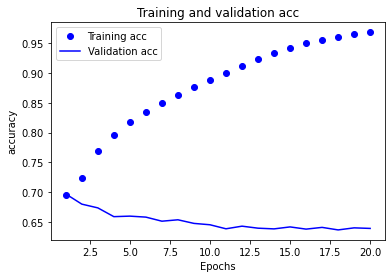

In [29]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [30]:
#results = model.evaluate(test_tfidf, np.array(test_label))

In [31]:
predictions = model.predict(test_tfidf)

In [32]:
print(predictions[0:5])

[[9.0482879e-01]
 [2.4172455e-02]
 [1.6421080e-05]
 [3.5166740e-06]
 [5.9604645e-08]]


In [33]:
#the query
test.set_index(['qid', 'sentid'], inplace=True)
test.groupby(level=[0,1])

In [34]:
len(test)

13420

In [35]:
dict_main = dict()
new_list = list(predictions)

In [36]:
for result in test.index.get_level_values('qid').unique():
    rowCounter = 0
    rowCounter += test.loc[result,"question"].count()
    dict_main[result] = new_list[:rowCounter]
    del new_list[:rowCounter]

In [37]:
test.head()

question  \
qid sentid                                                      
6   0       Which miRNAs could be used as potential biomar...   
    1       Which miRNAs could be used as potential biomar...   
    2       Which miRNAs could be used as potential biomar...   
    3       Which miRNAs could be used as potential biomar...   
    4       Which miRNAs could be used as potential biomar...   

                                                sentence text  label  
qid sentid                                                            
6   0       Finally, five promising differentially miRNAs ...      1  
    1       MiR-200a, miR-200b, miR-200c, and miR-141, all...      0  
    2       Upregulation of microRNA-203 is associated wit...      0  
    3       multivariate analysis showed that the status o...      0  
    4       These findings provide the convincing evidence...      0

In [38]:
def nn_summariser(csvfile, questionids, n):
    temp_list = []
    Main_result = []
    
    for i in questionids:
        counter = 0
        result = dict()
        temp_list = dict_main[i]
        for j in range(len(temp_list)):
            if counter != len(temp_list):
                result[counter] = temp_list[counter][0]
                sorted_result = sorted(result.items(), key=lambda kv: kv[1], reverse=True)
                store = [x for x, r in sorted_result]
                counter+=1
        Main_result.append(store[0:n])
    return Main_result

In [39]:
nn_summariser(test, [6,7], 5)

[[7, 25, 0, 13, 19], [9, 4, 0, 6, 5]]

# Task 4 (5 marks): Recurrent NN

Use the files `training.csv`, `dev_test.csv`, and `test.csv` provided by us.

Implement a more complex neural network that is composed of the following layers:

* An embedding layer that generates embedding vectors of the sentence text with 35 dimensions.
* A LSTM layer. You need to determine the size of this LSTM layer, and the text length limit (if needed).
* The final output layer with one cell for binary classification, as in task 3.

Train the model with the training data, use the dev_test set to determine a good size of the LSTM layer and an appropriate length limit (if needed), and report the final results using the test set. Again, remember to use the test set only after you have determined the optimal parameters of the LSTM layer.

Based on your experiments, comment on whether this system is better than the systems developed in the previous tasks.

The breakdown of marks is as follows:

* **1 mark** if the NN model has the correct layers, the correct activation functions, and the correct loss function.
* **1 mark** if the code passes the sentence text to the model correctly. The documentation needs to explain what decisions had to be made to process long sentences. In particular, did you need to truncate the input text, and how did you determine the length limit?
* **1 mark** if the code returns the IDs of the *n* sentences that have the highest prediction score in the given question.
* **1 mark** if the notebook reports the F1 scores of the test sets and comments on the results.
* **1 mark** for good coding and documentation in this task. In particular, the code and results must include evidence that shows your choice of best size of the LSTM layer. The explanations must be clear and concise. To make this task less time-consuming, use $n=5$.

In [40]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, LSTM, Flatten
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [41]:
len(train_text)

37951

In [42]:
Vocab_size = len(train_text)
encoded_train = [one_hot(d,Vocab_size) for d in train_text]
encoded_dev_test = [one_hot(d,Vocab_size) for d in dev_test_text]
encoded_test = [one_hot(d,Vocab_size) for d in test_text]

In [43]:
encoded_train[0]

[14267,
 7928,
 31827,
 7158,
 32620,
 16248,
 22844,
 16495,
 6686,
 7928,
 31827,
 7158,
 18725,
 31587,
 106,
 10992]

In [44]:
trainMax = [] 
for i in range(len(encoded_train)):
    trainMax.append(len(encoded_train[i]))
print(max(trainMax))

382


In [45]:
dev_testMax = [] 
for j in range(len(encoded_dev_test)):
        dev_testMax.append(len(encoded_dev_test[j]))
print(max(dev_testMax))

319


In [46]:
testMax = [] 
for q in range(len(encoded_test)):
            testMax.append(len(encoded_test[q]))
print(max(testMax))

401


In [56]:
padded_train = pad_sequences(encoded_train, maxlen=max(trainMax))
padded_dev_test = pad_sequences(encoded_dev_test, maxlen=max(trainMax))
padded_test = pad_sequences(encoded_test, maxlen=max(trainMax))

In [57]:
model = models.Sequential()
model.add(layers.Embedding(len(train_text), 35, input_length = max(count)))
model.add(layers.LSTM(35)) 
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 382, 35)           1328285   
_________________________________________________________________
lstm_1 (LSTM)                (None, 35)                9940      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 36        
Total params: 1,338,261
Trainable params: 1,338,261
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(padded_train, np.array(train_label), 
                    epochs = 10, 
                    batch_size = 1000, 
                    validation_data = (padded_dev_test, np.array(dev_test_label)))
                    #callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=2)])

Train on 37951 samples, validate on 12741 samples
Epoch 1/10


2022-04-21 23:55:12.412697: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_cudnn_lstm_with_fallback_7804_7986' and '__inference___backward_standard_lstm_8137_8622_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_8806' both implement 'lstm_b708ed23-b126-43c9-aed6-4b46b85c095d' but their signatures do not match.


37000/37951 [============================>.] - ETA: 2s - loss: 0.6193 - accuracy: 0.6936

2022-04-21 23:56:52.860054: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_9120_specialized_for_sequential_2_lstm_1_StatefulPartitionedCall_at___inference_distributed_function_9479' and '__inference_cudnn_lstm_with_fallback_9231' both implement 'lstm_bbb23594-c1f8-46b8-ae04-a456a590bd55' but their signatures do not match.


37951/37951 [==============================] - 116s 3ms/sample - loss: 0.6188 - accuracy: 0.6938 - val_loss: 0.6076 - val_accuracy: 0.6973
Epoch 2/10
37951/37951 [==============================] - 124s 3ms/sample - loss: 0.5741 - accuracy: 0.7016 - val_loss: 0.6142 - val_accuracy: 0.6810
Epoch 3/10
31000/37951 [=======================>......] - ETA: 20s - loss: 0.5339 - accuracy: 0.7409

# Submission of results

Your submission should consist of this Jupyter notebook with all your code and explanations inserted into the notebook as text cells. **The notebook should contain the output of the runs. All code should run. Code with syntax errors or code without output will not be assessed.**

**Do not submit multiple files. If you feel you need to submit multiple files, please contact Diego.Molla-Aliod@mq.edu.au first.**

Examine the text cells of this notebook so that you can have an idea of how to format text for good visual impact. You can also read this useful [guide to the MarkDown notation](https://daringfireball.net/projects/markdown/syntax),  which explains the format of the text cells.

Each task specifies a number of marks. The final mark of the assignment is the sum of all the marks of each individual task.

By submitting this assignment you are acknowledging that this is your own work. Any submissions that break the code of academic honesty will be penalised as per [the academic integrity policy](https://policies.mq.edu.au/document/view.php?id=3).

Late submissions **will not be accepted** without an approved [Special Consideration](http://from.mq.edu.au/MT0X0E0FUrrU200rm0JB0U0) request.  Assessments submitted after the due date will receive a mark of **zero**.